<a href="https://colab.research.google.com/github/minseo0228/yolov5/blob/main/yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [12]:
import platform
platform.platform()

'Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic'

In [17]:
cd yolov5

/content/yolov5


In [18]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 15.0 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 1.6 MB 61.9 MB/s 


In [19]:
import matplotlib.pyplot as plt

In [27]:
!python train.py --data "data/data.yaml" --cfg "models/yolov5s.yaml" --batch 8 --epochs 8

train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=8, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-266-g72cad39 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hs

In [28]:
!python val.py --data "data/data.yaml" --weights "/content/yolov5/runs/train/exp8/weights/best.pt"

val: data=data/data.yaml, weights=['/content/yolov5/runs/train/exp8/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-266-g72cad39 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolov5/data/labels/train.cache... 58 images, 0 backgrounds, 122 corrupt: 100% 180/180 [00:00<?, ?it/s]
train: WARNING ⚠️ /content/yolov5/data/images/train/공인_003.jpg: ignoring corrupt image/label: image file is truncated (23 bytes not processed)
train: WARNING ⚠️ /content/yolov5/data/images/train/공인_004.jpg: ignoring corrupt image/label: image file is truncated (47 bytes not processed)
train: WARNING ⚠️ /content/yolov5/d

In [35]:
!python detect.py --weights "/content/yolov5/runs/train/exp8/weights/best.pt" --source "/content/yolov5/data/test"

detect: weights=['/content/yolov5/runs/train/exp8/weights/best.pt'], source=/content/yolov5/data/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-266-g72cad39 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/2 /content/yolov5/data/test/공인_002.jpg: 640x480 (no detections), 13.4ms
image 2/2 /content/yolov5/data/test/삼성_002.jpg: 640x448 (no detections), 12.1ms
Speed: 2.2ms pre-process, 12.8ms inference, 0.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


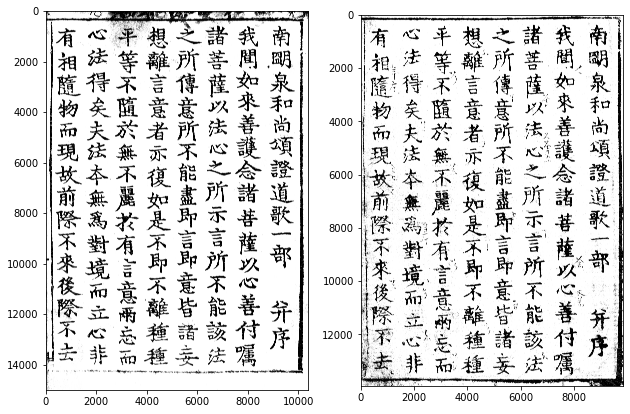

In [34]:
import cv2
import matplotlib.pyplot as plt
from glob import glob
img_paths = glob("runs/detect/exp/*")
plt.figure(figsize=(16, 10))
plt.subplot(1,3,1)
plt.imshow(cv2.imread(img_paths[0]))
plt.subplot(1,3,2)
plt.imshow(cv2.imread(img_paths[1]))
plt.show()